In [1]:
# check the current python version, make sure this is the one that with HDDM correctly installed
import sys
sys.executable

'/usr/bin/python2'

In [2]:
pip install pandas

In [3]:
pip install pymc

     |████████████████████████████████| 389kB 6.8MB/s 
  Created wheel for pymc: filename=pymc-2.3.8-cp27-cp27mu-linux_x86_64.whl size=1044702 sha256=df752ce05af23efaa9aa56cd1df0cf0fa4a96347570bd82323d447c1652cb05b
  Stored in directory: /root/.cache/pip/wheels/0b/a8/e7/8f3ba91a39294d538a92db052fd1fcba1fca74a58c8b022026
Successfully built pymc


In [4]:
pip install hddm

     |████████████████████████████████| 604kB 5.3MB/s 
  Using cached https://files.pythonhosted.org/packages/00/c7/2a9931d4b7febf449a21dc2d0290e77f56f648e3e8f80c978fc93d4dccb2/kabuki-0.6.3.tar.gz
  Created wheel for hddm: filename=HDDM-0.8.0-cp27-cp27mu-linux_x86_64.whl size=372434 sha256=73c2ac9aa8febaef557a7a70677b4a3933ef0bd1da98cfd2efe66a59df07e040
  Stored in directory: /root/.cache/pip/wheels/21/c3/c2/0f321d3c3838e33dedf21bebea05efb84e300f0e517d600883
  Created wheel for kabuki: filename=kabuki-0.6.3-cp27-none-any.whl size=36532 sha256=37d21d2ada0a5a873a51baf4a73f8850495af5fcb8603bccb043f8b8f6dffea6
  Stored in directory: /root/.cache/pip/wheels/e7/b3/f0/f63833103cbccb322674dc63560e5aae52d46587ee402d8a7a
Successfully built hddm kabuki


In [5]:
%matplotlib inline
# Preparation
import os, hddm, time, csv
import datetime

# import the toolbox
import pandas as pd
import matplotlib.pyplot as plt
from datetime import date

# set the color of plots
from cycler import cycler
plt.rcParams['axes.prop_cycle'] = cycler(color='bgrcmykw')

/usr/local/lib/python2.7/dist-packages/IPython/parallel.py:13: ShimWarning: The `IPython.parallel` package has been deprecated since IPython 4.0. You should import from ipyparallel instead.
  "You should import from ipyparallel instead.", ShimWarning)


In [7]:
# load data from cateogriztion based on moral valence
dat_M_match = hddm.load_csv('coke_chn_hddm.csv')

dat_M_match.head(100)  

,subj_idx,Age,Name,Sex,SubTrial,Label,Brand,YesNoResp,Procedure[Block],response,match,stim,fans,rt,cong,preference
0,96,19,helang,male,50,friend,pepsi,No,unmatchProc,1,unmatch,0,pepei_fans,0.200,cong,6.0
1,96,19,helang,male,24,friend,circle,Yes,unmatchProc,1,match,1,pepei_fans,0.201,cong,6.0
2,96,19,helang,male,32,self,pepsi,Yes,unmatchProc,0,match,1,pepei_fans,0.206,cong,6.0
3,96,19,helang,male,39,friend,coca,No,unmatchProc,1,unmatch,0,pepei_fans,0.208,cong,6.0
4,96,19,helang,male,53,stranger,coca,Yes,unmatchProc,1,match,1,pepei_fans,0.209,cong,6.0
5,96,19,helang,male,39,self,pepsi,Yes,unmatchProc,1,match,1,pepei_fans,0.210,cong,6.0
6,96,19,helang,male,34,self,pepsi,Yes,unmatchProc,1,match,1,pepei_fans,0.211,cong,6.0
7,96,19,helang,male,42,stranger,pepsi,No,unmatchProc,1,unmatch,0,pepei_fans,0.214,cong,6.0
8,96,19,helang,male,52,friend,pepsi,No,unmatchProc,1,unmatch,0,pepei_fans,0.217,cong,6.0
9,96,19,helang,male,37,friend,coca,No,unmatchProc,1,unmatch,0,pepei_fans,0.217,cong,6.0


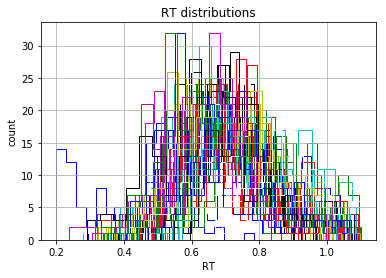

In [8]:
fig = plt.figure()
ax = fig.add_subplot(111, xlabel='RT', ylabel='count', title='RT distributions')
for i, subj_data in dat_M_match.groupby('subj_idx'):
    subj_data.rt.hist(bins=20, histtype='step', ax=ax)
plt.savefig('distribution.pdf')

In [32]:
nsample = 1000  # number of sampling
nburn   = 50     # number of burn

# dateToday = str(date.today())  # replace the code below if you prefer using the actual date
dateToday = 'final' # using final in the saved file name

#### Model 1

In [ ]:
start_time = time.time()  # the start time of the processing
 
import warnings           # suppress the warnings
warnings.simplefilter('ignore')

dbname = "M_match_m1_" 
M_match_m1 = hddm.HDDMStimCoding(dat_M_match, 
                                    include=('z'), 
                                    stim_col='stim', 
                                    depends_on={'v':['Label','fans','cong','match'],'z':['Label','fans','cong','match'],'t':['Label','fans','cong','match']},
                                    split_param='v', 
                                    drift_criterion=False,
                                  p_outlier=0.05)
                            

M_match_m1.find_starting_values()
M_match_m1.sample(nsample, burn=nburn, dbname=dbname+ '.db', db='pickle')
   
# save the model
M_match_m1.save(dbname)
print("M_match_m1_selfie DIC: %f" %M_match_m1.dic) # DIC: -6555.170198

 [---               8%                  ] 80 of 1000 complete in 300.9 sec

In [ ]:
ppc_data_match_m1 = hddm.utils.post_pred_gen(M_match_m1)
ppc_compare_match_m1 = hddm.utils.post_pred_stats(dat_M_match, ppc_data_match_m1)  # MSE 
ppc_compare_match_m1.to_csv('ppc_compare_match_m1_thumb.csv', sep = ',')
hddm.analyze.plot_posterior_nodes([t_SelfCongMatch])

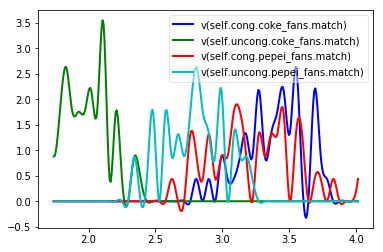

In [25]:
v1,v2,v3,v4=M_match_m1.nodes_db.node[['v(self.cong.coke_fans.match)','v(self.uncong.coke_fans.match)','v(self.cong.pepei_fans.match)','v(self.uncong.pepei_fans.match)']]
hddm.analyze.plot_posterior_nodes([v1,v2,v3,v4])

In [26]:
print "P_(v1>v2)=",(v1.trace()>v2.trace()).mean() #coke cong vs incong
print "P_(v3>v4)=",(v3.trace()>v4.trace()).mean() #pepsi cong vs incong
print "P_(v1>v3)=",(v1.trace()>v3.trace()).mean() #coke cong vs pepsi cong
print "P_(v2>v4)=",(v2.trace()>v4.trace()).mean() #coke incong vs. pepsi incong


P_(v1>v2)= 1.0
P_(v3>v4)= 0.84
P_(v1>v3)= 0.68
P_(v2>v4)= 0.0


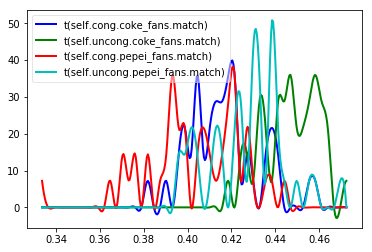

In [27]:
t1,t2,t3,t4=M_match_m1.nodes_db.node[['t(self.cong.coke_fans.match)','t(self.uncong.coke_fans.match)','t(self.cong.pepei_fans.match)','t(self.uncong.pepei_fans.match)']]
hddm.analyze.plot_posterior_nodes([t1,t2,t3,t4])

In [28]:
print "P_(t1>t2)=",(t1.trace()>t2.trace()).mean() #coke cong vs incong
print "P_(t3>t4)=",(t3.trace()>t4.trace()).mean() #pepsi cong vs incong
print "P_(t1>t3)=",(t1.trace()>t3.trace()).mean() #coke cong vs pepsi cong
print "P_(t2>t4)=",(t2.trace()>t4.trace()).mean() #coke incong vs. pepsi incong


P_(t1>t2)= 0.06
P_(t3>t4)= 0.24
P_(t1>t3)= 0.74
P_(t2>t4)= 0.8


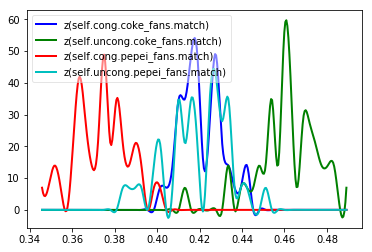

In [29]:
z1,z2,z3,z4=M_match_m1.nodes_db.node[['z(self.cong.coke_fans.match)','z(self.uncong.coke_fans.match)','z(self.cong.pepei_fans.match)','z(self.uncong.pepei_fans.match)']]
hddm.analyze.plot_posterior_nodes([z1,z2,z3,z4])

In [31]:
print "P_(z1<z2)=",(z1.trace()<z2.trace()).mean() #coke cong vs incong
print "P_(z3>z4)=",(z3.trace()>z4.trace()).mean() #pepsi cong vs incong
print "P_(z1>z3)=",(z1.trace()>z3.trace()).mean() #coke cong vs pepsi cong
print "P_(z2>z4)=",(z2.trace()>z4.trace()).mean() #coke incong vs. pepsi incong

P_(z1<z2)= 0.98
P_(z3>z4)= 0.0
P_(z1>z3)= 1.0
P_(z2>z4)= 1.0


#### Model 2

In [19]:
dbname = "M_match_m2_" 
M_match_m2 = hddm.HDDMStimCoding(dat_M_match, 
                                    include=('z'), 
                                    stim_col='stim', 
                                   depends_on={'v':['Label','cong','match'],'z':['Label','cong','match']},
                                    split_param='v', 
                                    drift_criterion=False,
                                    p_outlier=0.05)
                            

M_match_m2.find_starting_values()
M_match_m2.sample(nsample, burn=nburn, dbname=dbname+ '.db', db='pickle')
   
# save the model
M_match_m2.save(dbname)
print("M_match_m2_selfie DIC: %f" %M_match_m2.dic) #DIC: -6544.182629

 [-----------------100%-----------------] 1001 of 1000 complete in 3330.8 secM_match_m2_selfie DIC: -5186.968079


In [ ]:
subj_data=M_match_m2.get_subj_nodes()
subj_data.to_csv('coke2.csv')

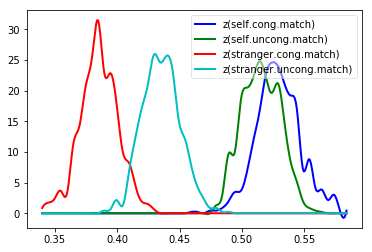

In [20]:
v1,v2,v3,v4=M_match_m2.nodes_db.node[['z(self.cong.match)','z(self.uncong.match)','z(stranger.cong.match)','z(stranger.uncong.match)']]
hddm.analyze.plot_posterior_nodes([v1,v2,v3,v4])

In [21]:
print "P_(v1>v2)=",(v1.trace()>v2.trace()).mean()
print "P_(v3>v4)=",(v3.trace()>v4.trace()).mean()
print "P_(v1>v3)=",(v1.trace()>v3.trace()).mean()
print "P_(v2>v4)=",(v2.trace()>v4.trace()).mean()

P_(v1>v2)= 0.7126315789473684
P_(v3>v4)= 0.017894736842105262
P_(v1>v3)= 1.0
P_(v2>v4)= 1.0


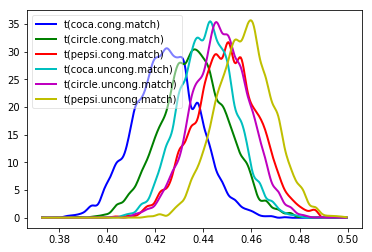

In [ ]:
t_CocaCongMatch,t_NullCongMatch,t_PepsiStrangerCong,t_CocainCongMatch,t_NullinCongMatch,t_PepsiinCong=M_match_m2.nodes_db.node[['t(coca.cong.match)','t(circle.cong.match)','t(pepsi.cong.match)','t(coca.uncong.match)','t(circle.uncong.match)','t(pepsi.uncong.match)']]
hddm.analyze.plot_posterior_nodes([t_CocaCongMatch,t_NullCongMatch,t_PepsiStrangerCong,t_CocainCongMatch,t_NullinCongMatch,t_PepsiinCong])

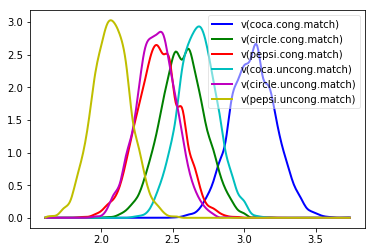

In [ ]:
v_CocaCongMatch,v_NullCongMatch,v_PepsiStrangerCong,v_CocainCongMatch,v_NullinCongMatch,v_PepsiinCong=M_match_m2.nodes_db.node[['v(coca.cong.match)','v(circle.cong.match)','v(pepsi.cong.match)','v(coca.uncong.match)','v(circle.uncong.match)','v(pepsi.uncong.match)']]
hddm.analyze.plot_posterior_nodes([v_CocaCongMatch,v_NullCongMatch,v_PepsiStrangerCong,v_CocainCongMatch,v_NullinCongMatch,v_PepsiinCong])

In [ ]:
ppc_data_match_m2 = hddm.utils.post_pred_gen(M_match_m2)
ppc_compare_match_m2 = hddm.utils.post_pred_stats(dat_M_match, ppc_data_match_m2)  # MSE 
ppc_compare_match_m2.to_csv('ppc_compare_match_m2_thumb.csv', sep = ',')

#### Model 3

In [ ]:
dbname = "M_match_m3_" 
M_match_m3 = hddm.HDDMStimCoding(dat_M_match, 
                                    include=('z'), 
                                    stim_col='stim', 
                                    depends_on={'v':['Brand','cong','match'],'t':['Brand','cong','match'],'a':['Brand','cong']},
                                    split_param='v', 
                                    drift_criterion=False,
                                    p_outlier=0.05)
                            

M_match_m3.find_starting_values()
M_match_m3.sample(nsample, burn=nburn, dbname=dbname+ '.db', db='pickle')
   
# save the model
M_match_m3.save(dbname)


print("M_match_m3_thumb DIC: %f" %M_match_m3.dic) #DIC: -6575.643769

 [-----------------100%-----------------] 10001 of 10000 complete in 31089.3 secM_match_m3_thumb DIC: -6575.643769


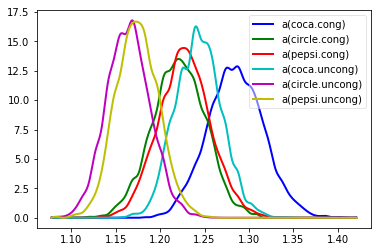

In [ ]:
a_CocaCong,a_NullCong,a_PepsiCong,a_CocainCong,a_NullinCong,a_PepsiinCong=M_match_m3.nodes_db.node[['a(coca.cong)','a(circle.cong)','a(pepsi.cong)','a(coca.uncong)','a(circle.uncong)','a(pepsi.uncong)']]
hddm.analyze.plot_posterior_nodes([a_CocaCong,a_NullCong,a_PepsiCong,a_CocainCong,a_NullinCong,a_PepsiinCong])

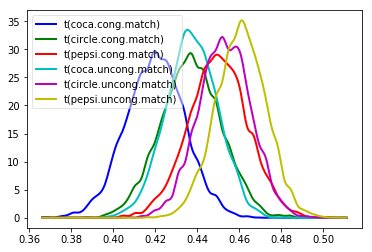

In [ ]:
t_CocaCongMatch,t_NullCongMatch,t_PepsiStrangerCong,t_CocainCongMatch,t_NullinCongMatch,t_PepsiinCong=M_match_m3.nodes_db.node[['t(coca.cong.match)','t(circle.cong.match)','t(pepsi.cong.match)','t(coca.uncong.match)','t(circle.uncong.match)','t(pepsi.uncong.match)']]
hddm.analyze.plot_posterior_nodes([t_CocaCongMatch,t_NullCongMatch,t_PepsiStrangerCong,t_CocainCongMatch,t_NullinCongMatch,t_PepsiinCong])

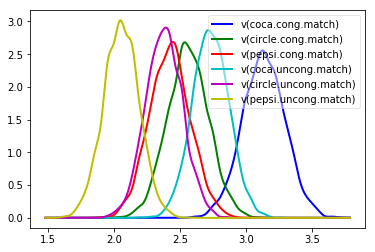

In [ ]:
v_CocaCongMatch,v_NullCongMatch,v_PepsiStrangerCong,v_CocainCongMatch,v_NullinCongMatch,v_PepsiinCong=M_match_m3.nodes_db.node[['v(coca.cong.match)','v(circle.cong.match)','v(pepsi.cong.match)','v(coca.uncong.match)','v(circle.uncong.match)','v(pepsi.uncong.match)']]
hddm.analyze.plot_posterior_nodes([v_CocaCongMatch,v_NullCongMatch,v_PepsiStrangerCong,v_CocainCongMatch,v_NullinCongMatch,v_PepsiinCong])

In [ ]:
subj_data=M_match_m3.get_subj_nodes()
subj_data.to_csv('coke3.csv')

In [ ]:
ppc_data_match_m3 = hddm.utils.post_pred_gen(M_match_m3)
ppc_compare_match_m3 = hddm.utils.post_pred_stats(dat_M_match, ppc_data_match_m3)  # MSE 
ppc_compare_match_m3.to_csv('ppc_compare_match_m3_thumb.csv', sep = ',')


#### Model 4

In [ ]:
dbname = "M_match_m4_" 
M_match_m4 = hddm.HDDMStimCoding(dat_M_match, 
                                    include=('z'), 
                                    stim_col='stim', 
                                    depends_on={'v':['Label','cong','match'],'t':['Label','cong','match'],'a':['Label','cong']},
                                    split_param='v', 
                                    drift_criterion=False,
                                    p_outlier=0.05)
                            

M_match_m4.find_starting_values()
M_match_m4.sample(nsample, burn=nburn, dbname=dbname+ '.db', db='pickle')
   
# save the model
M_match_m4.save(dbname)


print("M_match_m4_thumb DIC: %f" %M_match_m4.dic) #DIC: -6546.193656

 [-----------------100%-----------------] 10001 of 10000 complete in 23095.2 secM_match_m4_thumb DIC: -6546.193656


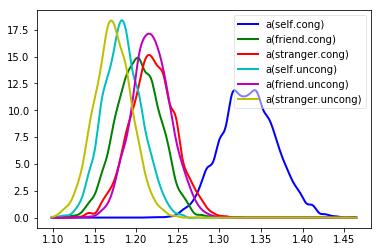

In [ ]:
a_SelfCong,a_FriendCong,a_StrangerCong,a_SelfinCong,a_FriendinCong,a_StrangerinCong=M_match_m4.nodes_db.node[['a(self.cong)','a(friend.cong)','a(stranger.cong)','a(self.uncong)','a(friend.uncong)','a(stranger.uncong)']]
hddm.analyze.plot_posterior_nodes([a_SelfCong,a_FriendCong,a_StrangerCong,a_SelfinCong,a_FriendinCong,a_StrangerinCong])

In [ ]:
subj_data=M_match_m4.get_subj_nodes()
subj_data.to_csv('coke4.csv')

In [ ]:
ppc_data_match_m4 = hddm.utils.post_pred_gen(M_match_m4)
ppc_compare_match_m4 = hddm.utils.post_pred_stats(dat_M_match, ppc_data_match_m4)  # MSE 
ppc_compare_match_m4.to_csv('ppc_compare_match_m4_thumb.csv', sep = ',')


#### Model 5

In [ ]:
dbname = "M_match_m5_" 
M_match_m5 = hddm.HDDMStimCoding(dat_M_match, 
                                    include=('z'), 
                                    stim_col='stim', 
                                    depends_on={'v':['Brand','cong','match'],'t':['Brand','cong','match'],'z':['Brand','cong']},
                                    split_param='v', 
                                    drift_criterion=False,
                                    p_outlier=0.05)
                            

M_match_m5.find_starting_values()
M_match_m5.sample(nsample, burn=nburn, dbname=dbname+ '.db', db='pickle')
   
# save the model
M_match_m5.save(dbname)



print("M_match_m5_thumb DIC: %f" %M_match_m5.dic) # DIC: -6535.112837

 [-----------------100%-----------------] 10001 of 10000 complete in 24365.5 secM_match_m5_thumb DIC: -6535.112837


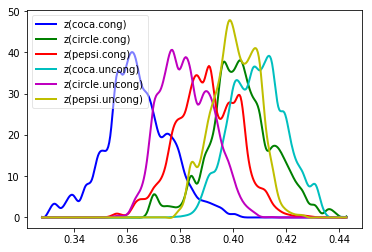

In [ ]:
z_CocaCong,z_NullCong,z_PepsiCong,z_CocainCong,z_NullinCong,z_PepsiinCong=M_match_m5.nodes_db.node[['z(coca.cong)','z(circle.cong)','z(pepsi.cong)','z(coca.uncong)','z(circle.uncong)','z(pepsi.uncong)']]
hddm.analyze.plot_posterior_nodes([z_CocaCong,z_NullCong,z_PepsiCong,z_CocainCong,z_NullinCong,z_PepsiinCong])

In [ ]:
subj_data=M_match_m5.get_subj_nodes()
subj_data.to_csv('coke5.csv')

In [ ]:
ppc_data_match_m5 = hddm.utils.post_pred_gen(M_match_m5)
ppc_compare_match_m5 = hddm.utils.post_pred_stats(dat_M_match, ppc_data_match_m5)  # MSE 
ppc_compare_match_m5.to_csv('ppc_compare_match_m5_thumb.csv', sep = ',')

#### Model 6

In [ ]:
dbname = "M_match_m6_" 
M_match_m6 = hddm.HDDMStimCoding(dat_M_match, 
                                    include=('z'), 
                                    stim_col='stim', 
                                    depends_on={'v':['Label','cong','match'],'t':['Label','cong','match'],'z':['Label','cong']},
                                    split_param='v', 
                                    drift_criterion=False,
                                    p_outlier=0.05)
                            

M_match_m6.find_starting_values()
M_match_m6.sample(nsample, burn=nburn, dbname=dbname+ '.db', db='pickle')
   
# save the model
M_match_m6.save(dbname)


print("M_match_m6_thumb DIC: %f" %M_match_m6.dic) #DIC: -6558.187687

 [-----------------100%-----------------] 10001 of 10000 complete in 24608.9 secM_match_m6_thumb DIC: -6558.187687


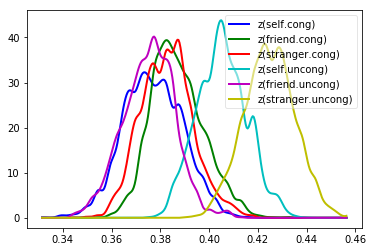

In [ ]:
z_SelfCong,z_FriendCong,z_StrangerCong,z_SelfinCong,z_FriendinCong,z_StrangerinCong=M_match_m6.nodes_db.node[['z(self.cong)','z(friend.cong)','z(stranger.cong)','z(self.uncong)','z(friend.uncong)','z(stranger.uncong)']]
hddm.analyze.plot_posterior_nodes([z_SelfCong,z_FriendCong,z_StrangerCong,z_SelfinCong,z_FriendinCong,z_StrangerinCong])

In [ ]:
subj_data=M_match_m6.get_subj_nodes()
subj_data.to_csv('coke6.csv')

In [ ]:
ppc_data_match_m6 = hddm.utils.post_pred_gen(M_match_m6)
ppc_compare_match_m6 = hddm.utils.post_pred_stats(dat_M_match, ppc_data_match_m6)  # MSE 
ppc_compare_match_m6.to_csv('ppc_compare_match_m6_thumb.csv', sep = ',')


#### Model 7

In [ ]:
dbname = "M_match_m7_" 
M_match_m6 = hddm.HDDMStimCoding(dat_M_match, 
                                    include=('z'), 
                                    stim_col='stim', 
                                    depends_on={'v':['Label','cong','match','fans'],'t':['Label','cong','match','fans']},
                                    split_param='v', 
                                    drift_criterion=False,
                                    p_outlier=0.05)
                            

M_match_m7.find_starting_values()
M_match_m7.sample(nsample, burn=nburn, dbname=dbname+ '.db', db='pickle')
   
# save the model
M_match_m7.save(dbname)


print("M_match_m7_thumb DIC: %f" %M_match_m7.dic) 

#### Check the convergence of MCMC

In [ ]:
# doing Gelman-Rubin statistic (time consuming)
models_match = []
for i in range(5):
    print('processing Model ', i, '\n')
    m_stim = hddm.HDDMStimCoding(dat_M_match,
                                 include=('z'), 
                                 stim_col='stim',
                                 depends_on={'v':['Label','cong','match'],'t':['Label','cong','match']},
                                 split_param='v',
                                 drift_criterion=False)
    m_stim.find_starting_values()
    m_stim.sample(nsample, burn = nburn)
    models_match.append(m_stim)

Match_R_hat_vtz4 = hddm.analyze.gelman_rubin(models_match)

# save Categ_R_hat_vtz
with open('Match_R_hat_vtz4_stim.csv','w') as f:
    w = csv.writer(f)
    w.writerows(Match_R_hat_vtz4.items())
    
    

('processing Model ', 0, '\n')
 [-----------------100%-----------------] 10001 of 10000 complete in 39568.1 sec('processing Model ', 1, '\n')
 [-----------------100%-----------------] 10001 of 10000 complete in 38485.0 sec('processing Model ', 2, '\n')
 [-----------------100%-----------------] 10001 of 10000 complete in 38071.5 sec('processing Model ', 3, '\n')
 [-----------------100%-----------------] 10001 of 10000 complete in 37496.6 sec('processing Model ', 4, '\n')
 [-----------------100%-----------------] 10001 of 10000 complete in 39121.8 sec

In [ ]:
from kabuki.analyze import check_geweke
print check_geweke(M_match_m1)

AssertionError: Chain of knode_name                    a
stochastic                 True
observed                  False
subj                      False
node                          a
tag                          ()
depends                      []
hidden                    False
subj_idx                    NaN
Age                         NaN
Name                        NaN
Sex                         NaN
SubTrial                    NaN
Label                       NaN
Brand                       NaN
YesNoResp                   NaN
Procedure[Block]            NaN
response                    NaN
match                       NaN
stim                        NaN
fans                        NaN
rt                          NaN
cong                        NaN
mean                    1.21627
std                   0.0153845
2.5q                    1.18659
25q                     1.20584
50q                     1.21601
75q                     1.22639
97.5q                   1.24696
mc err              0.000434981
map                     1.05062
Name: a, dtype: object not properly converged

Plotting a
Plotting a_std
Plotting v(circle.cong.match)
Plotting v(circle.cong.unmatch)
Plotting v(circle.uncong.match)
Plotting v(circle.uncong.unmatch)
Plotting v(coca.cong.match)
Plotting v(coca.cong.unmatch)
Plotting v(coca.uncong.match)
Plotting v(coca.uncong.unmatch)
Plotting v(pepsi.cong.match)
Plotting v(pepsi.cong.unmatch)
Plotting v(pepsi.uncong.match)
Plotting v(pepsi.uncong.unmatch)
Plotting v_std
Plotting t(circle.cong.match)
Plotting t(circle.cong.unmatch)
Plotting t(circle.uncong.match)
Plotting t(circle.uncong.unmatch)
Plotting t(coca.cong.match)
Plotting t(coca.cong.unmatch)
Plotting t(coca.uncong.match)
Plotting t(coca.uncong.unmatch)
Plotting t(pepsi.cong.match)
Plotting t(pepsi.cong.unmatch)
Plotting t(pepsi.uncong.match)
Plotting t(pepsi.uncong.unmatch)
Plotting t_std
Plotting z
Plotting z_std


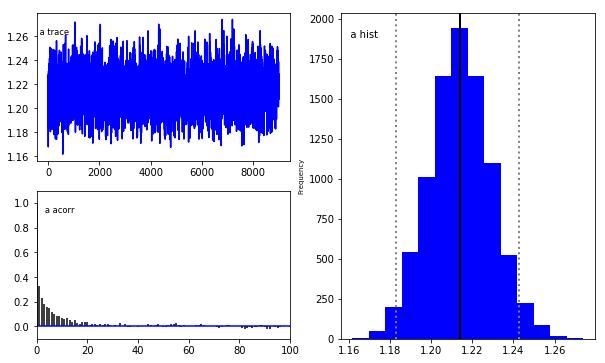

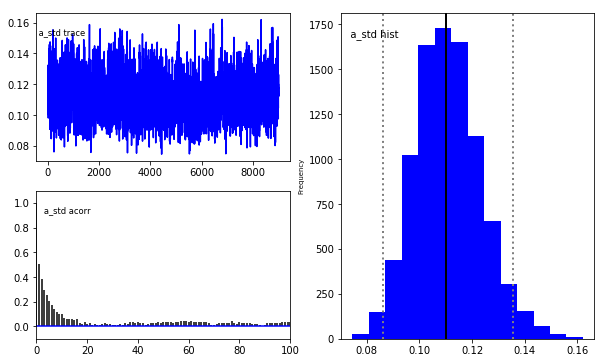

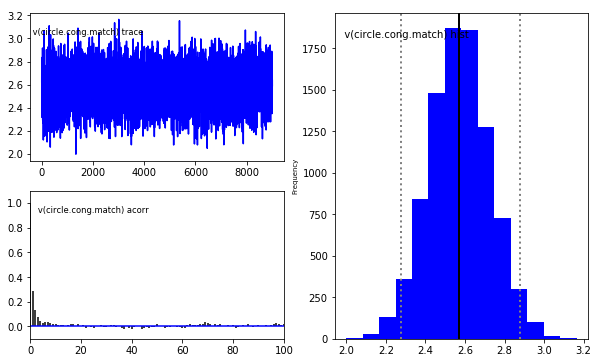

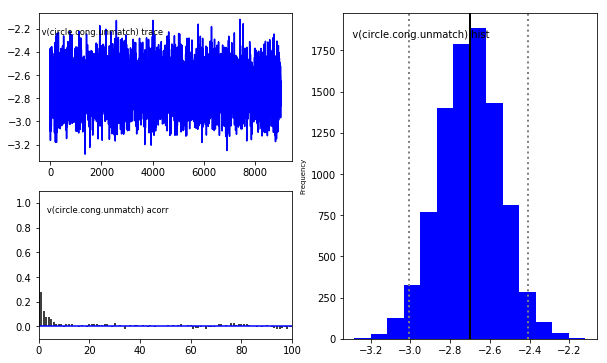

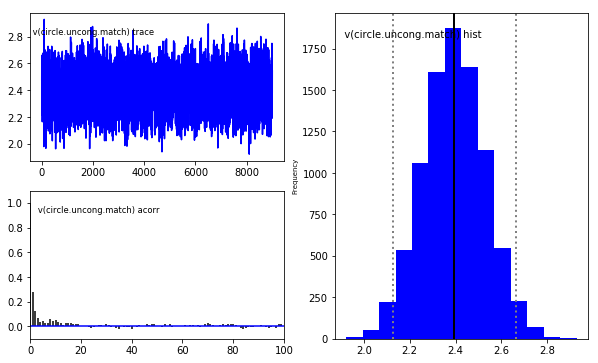

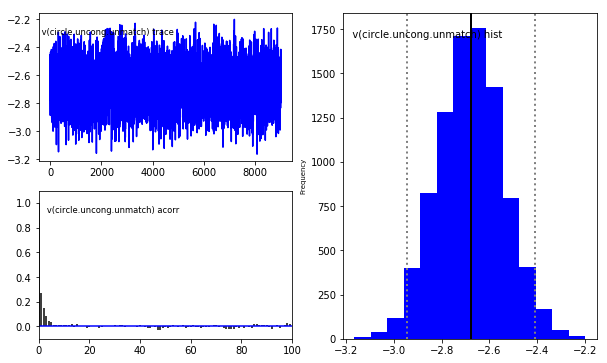

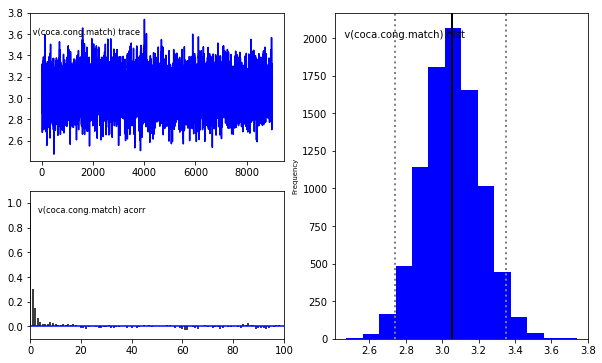

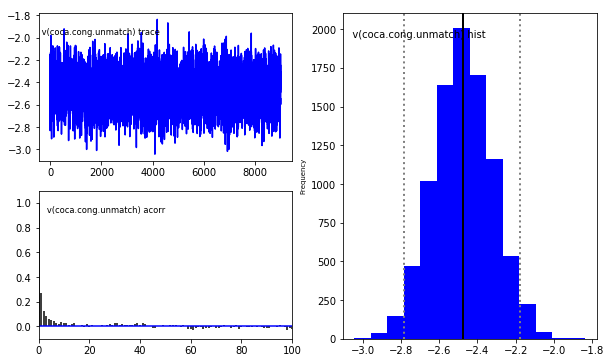

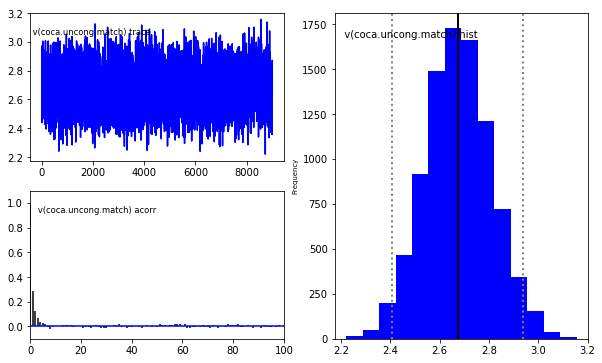

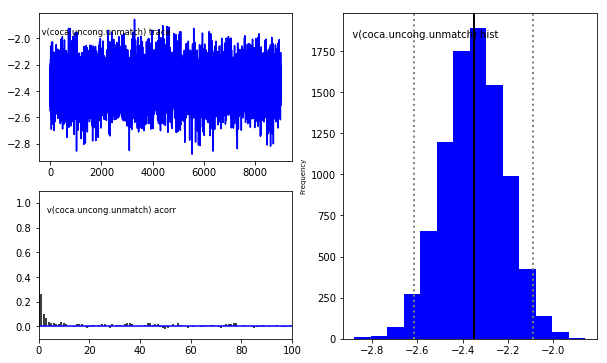

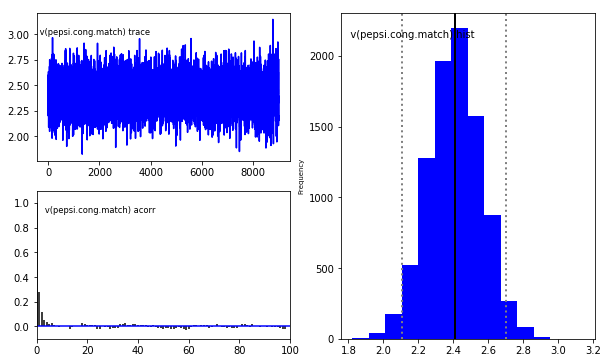

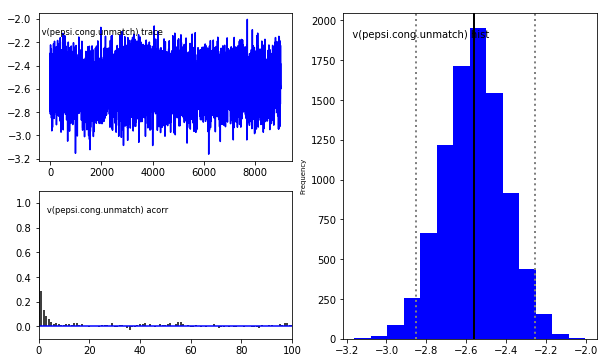

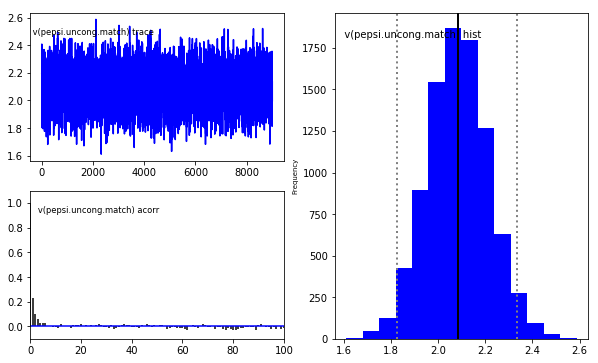

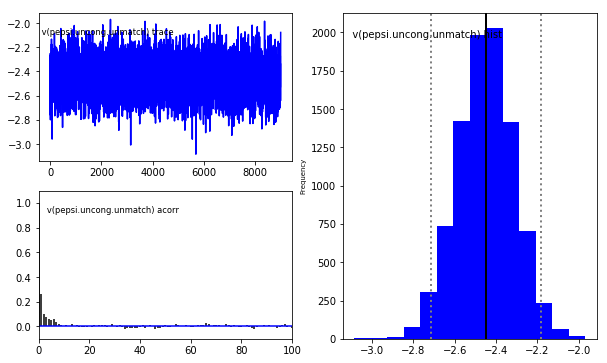

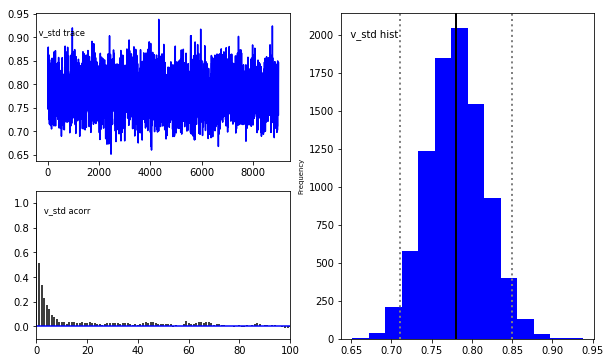

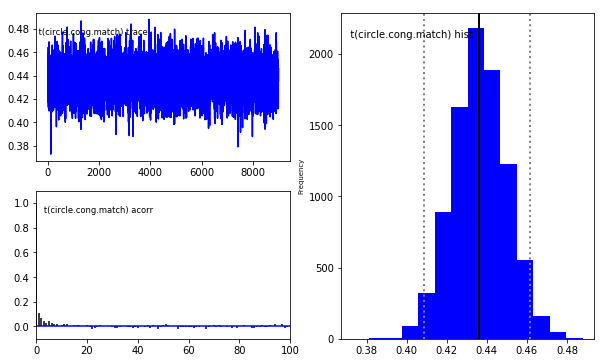

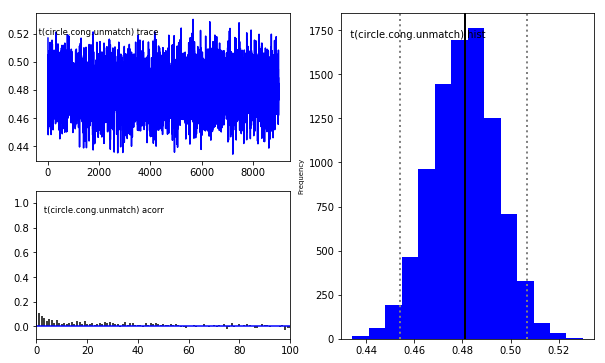

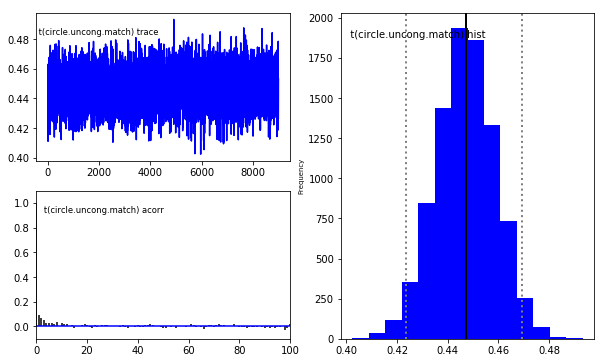

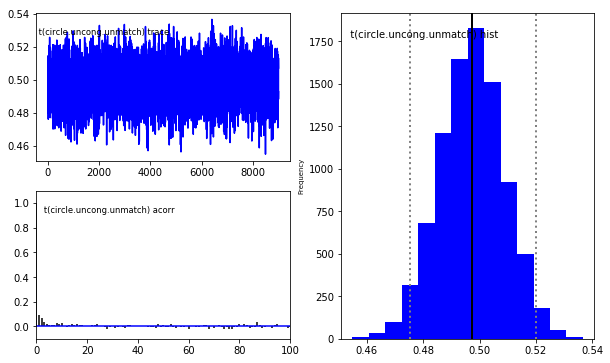

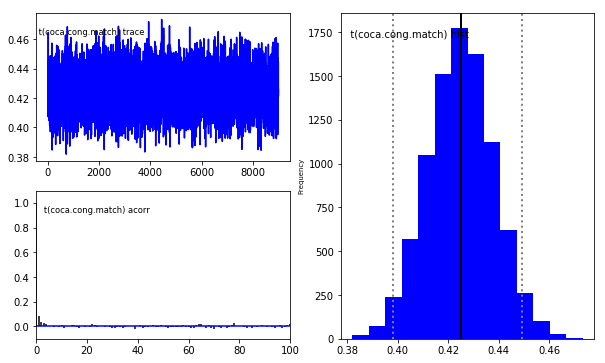

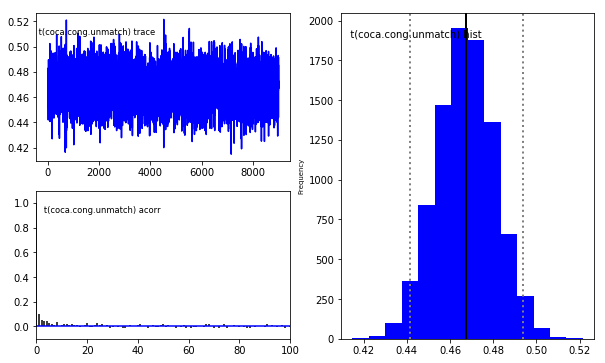

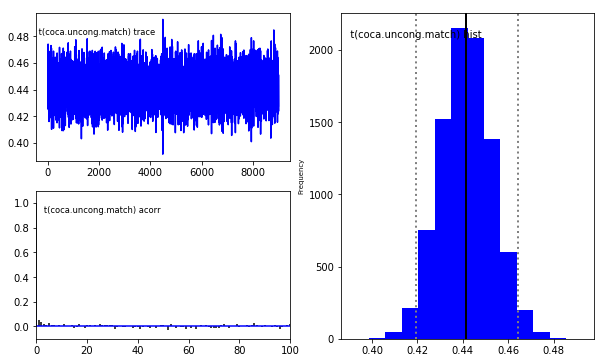

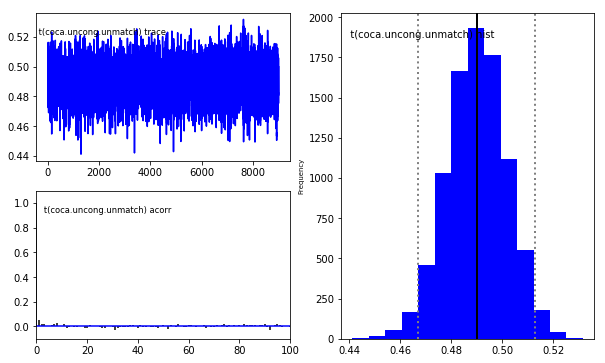

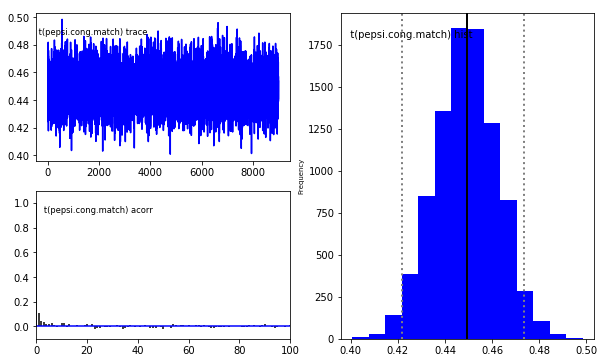

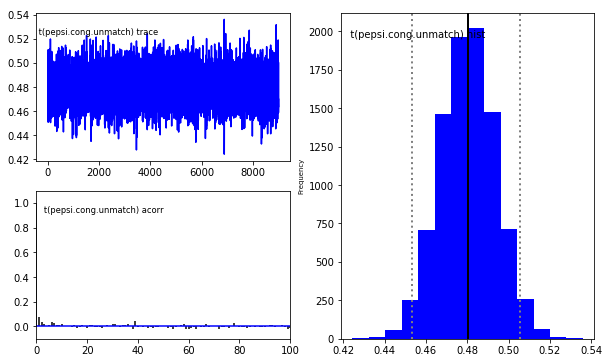

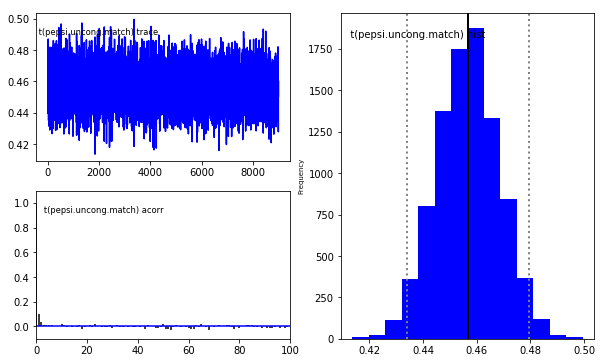

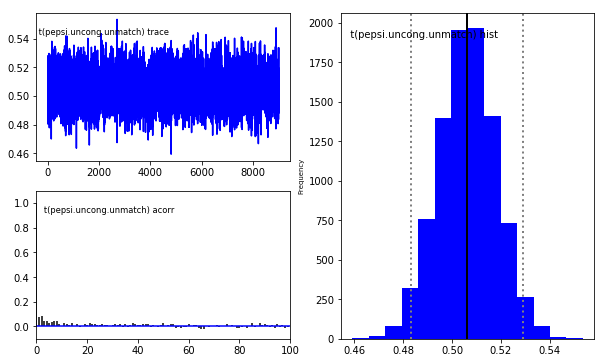

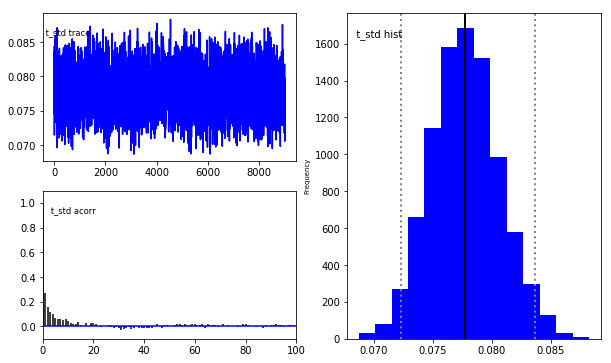

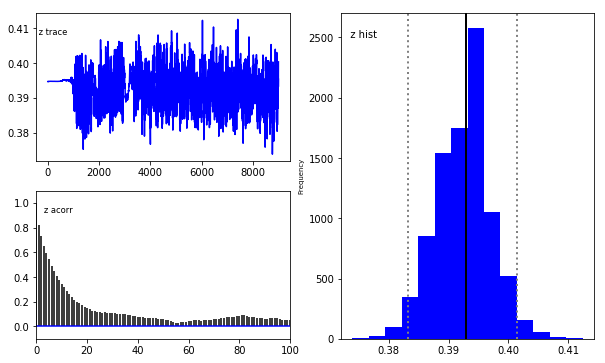

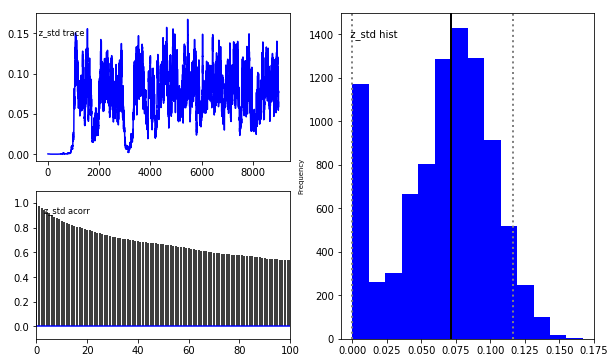

In [ ]:
M_match_m2.plot_posteriors()